# Decision Trees

## Example: we're interested in whether a customer is likely to come back within 30 days. 
- we have a snapshot of our customer base from some moment more than thirty days in the past. 
- We have purchase amount, number of items purchased, if they used a promo on their purchase, if they're subscribed to our email list, and how many times they have made a purchase.
- Since it's historical data, we also have a repeat variable for whether they were a repeat customer in the next thirty days from when this snapshot was taken.

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz


%matplotlib inline

In [3]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]

customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]

customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]

customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]

customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]


repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
#customers

In [7]:
#repeat_customer

## Create the tree

In [4]:

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1, # max_features is 1, meaning only one feature will be used per node. 
    max_depth=4,    # we only have four decision levels below the root for our classification
    
    #### do not ever do this in reality - 
    ### we set random_state to an arbitrary integer (1337). 
    ### This classifier works by repeatedly splitting the training data randomly, 
    ### which can lead to inconsistent trees. 
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1337,
            splitter='best')

## Tree visualization
- pip install pydotplus
- brew install graphviz

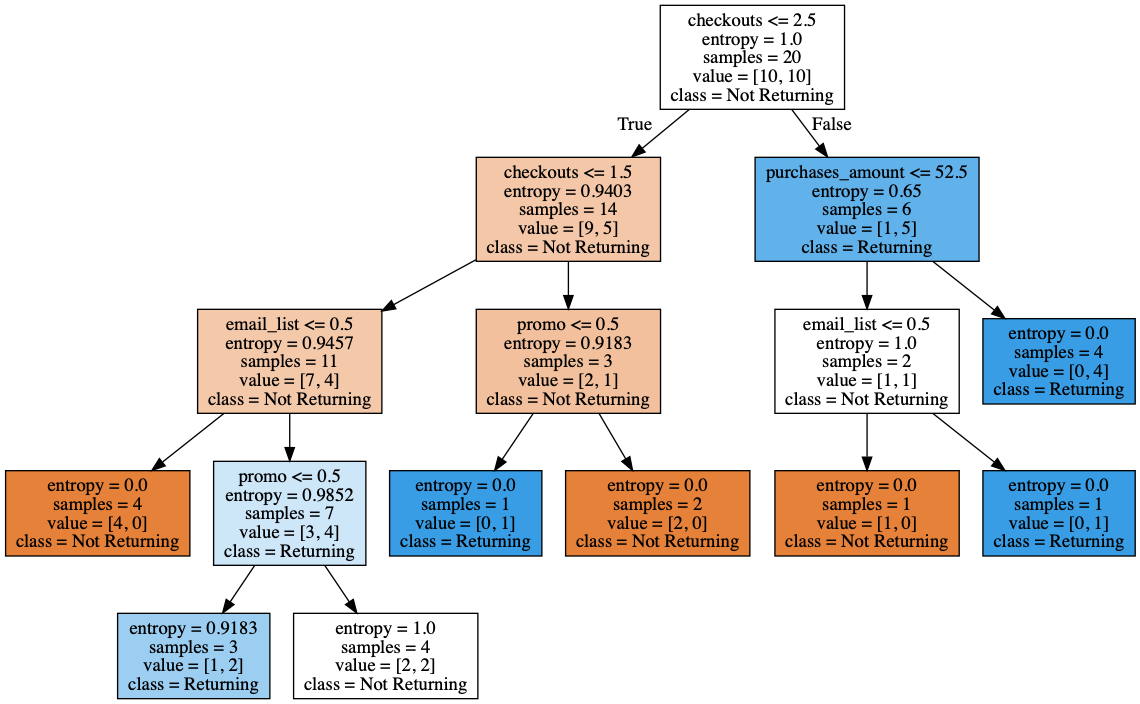

In [5]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Tree Analysis
- For every node it shows the rule being applied, the entropy in the dataset (1 being the most uncertain, 0 being totally certain), the samples remaining, the distribution of those samples, and the dominant class.

- As you move down a tree to the left you are meeting the rule, to the right you are outside of the rule. 
    * So in the branches below the root node, all nodes to the left have a checkouts value less than or equal to 2.5 and all the nodes to the right have a checkouts value that isn't less than or equal to .2.5. 
    * You can follow this all the way down the tree, and the same is true for each new rule introduced at each node.

#### playing with the above decision tree

- Spend a few minutes tinkering with this example and the arguments you pass into the model above. Remove the random_state argument and re-generate the tree a few times to see how random splitting changes your result. Change your max_depth to see how that affects things. Make sure you fully understand what each parameter does and what the tradeoffs are.

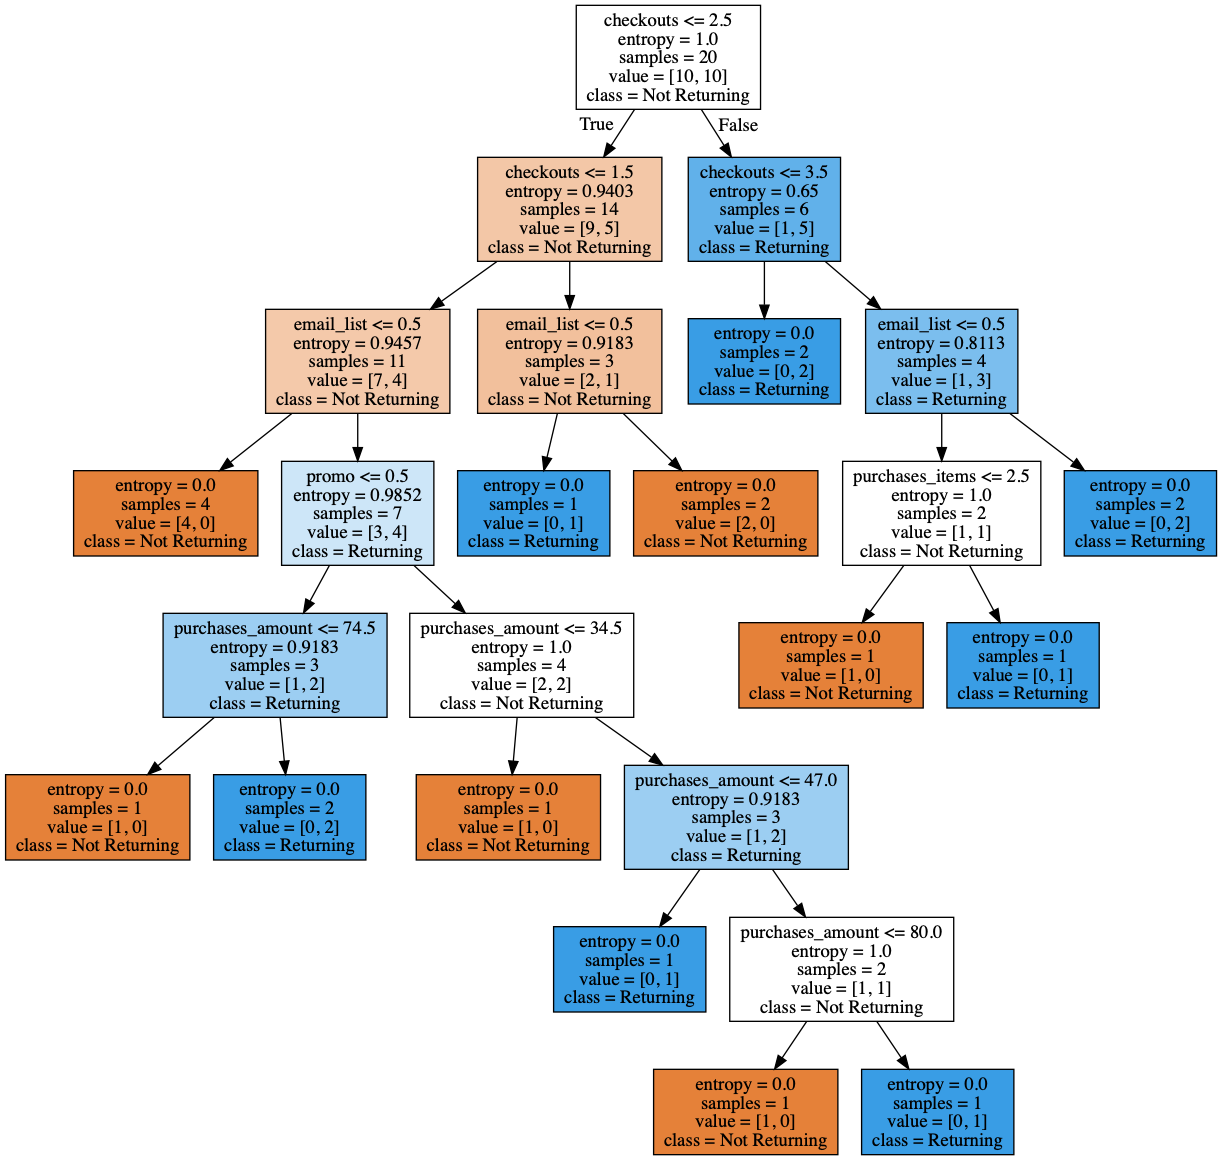

In [11]:

# Initialize and train our tree.
decision_tree2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1, # max_features is 1, meaning only one feature will be used per node. 
    max_depth=7,    # we only have four decision levels below the root for our classification
    ## taking the random out
     random_state = 1337
)
decision_tree2.fit(customers, repeat_customer)

# Render our tree.
dot_data2 = tree.export_graphviz(
    decision_tree2, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data2)
Image(graph.create_png())